In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# sklearn Linear Regression
## no standardization with train test split

In [2]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

'''LinearRegression(fit_intercept=True, 
    normalize=False, copy_X=True, n_jobs=None)
    
    keep normalize = False and use klearn.preprocessing.StandardScaler
    to scale'''

dataset = pd.read_csv('data/winequality.csv')
dataset.isnull().any() #does a True/False for nulls
dataset = dataset.fillna(method='ffill') #replaces the nulls
#add a constant @ the 0 position if needed
#dataset.insert(0,"Const", 1)

#X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
#y = dataset['quality'].values
X_dataset=dataset.columns
#note we drop the column headers too w/ . value
X = dataset.drop(['quality'], axis=1).values 
y = dataset['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)



# sklearn metrics

In [3]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('coefficients:',regressor.coef_)
print('Intercept:',regressor.intercept_)

Mean Absolute Error: 0.5035304415524371
Mean Squared Error: 0.3900251439639549
Root Mean Squared Error: 0.6245199307980129
coefficients: [ 2.30853339e-02 -1.00130443e+00 -1.40821461e-01  6.56431104e-03
 -1.80650315e+00  5.62733439e-03 -3.64444893e-03 -1.03515936e+01
 -3.93687732e-01  8.41171623e-01  2.81889567e-01]
Intercept: 14.355105195761844


# statsmodel OLS

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

dataset = pd.read_csv('data/winequality.csv')
dataset.isnull().any() #does a True/False for nulls
dataset = dataset.fillna(method='ffill') #replaces the nulls
#column headers kept
X1 = dataset.drop(['quality'],axis=1)
y1 = dataset['quality']
# new X df created with a const in row 1 if needed
X1 = sm.add_constant(X1)
results = sm.OLS(y1,X1).fit()
results.summary()


/home/mike/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sun, 29 Sep 2019   Prob (F-statistic):          1.79e-145
Time:                        15:17:59   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# alternate OLS input methods

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# will use dataset

# formulas
# model_name= smf.ols(formula='Y_column ~ X cols', df)
model1 = smf.ols(formula='quality ~ pH + alcohol', data=dataset)
result1 = model1.fit()
# with a categorical.var that drops the y intercept (-1) and does the fit
model2 = smf.ols(formula='alcohol ~ pH + C(alcohol) -1', data=dataset).fit()
# with a transformation
model3 = smf.ols(formula='alcohol ~ pH + np.log(alcohol) -1', data=dataset).fit()            

# numpy for beta coefficients
### make sure to check X vs X1 (sklearn vs statsmodel)

In [ ]:
'''
check for constant!
'''
beta = np.linalg.inv(X.T @ X) @ X.T @ y 

beta

# pretty table for coefficients

In [ ]:

beta = np.linalg.inv(X.T @ X) @ X.T @ y 
# @ is dot product
headers = dataset.columns

beta_dict={}
beta_dict['features']= headers.drop(['quality'])
beta_dict['beta']=beta
beta_df=pd.DataFrame(beta_dict)
beta_df

# Sklearn Kfold Linear regression with standardization


In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler



data=pd.read_csv('')
X = data.drop(['Y_column'], axis=1)
y = data['Y_column']
#(make cross validation set (cross) and holdout set)

X_cross, X_hold, y_cross, y_hold = train_test_split(X, y, test_size=0.25,random_state=42)
kf = KFold(n_splits=5)
RMSE=[]
scores=[]
scaler = StandardScaler()

for train_index, test_index in kf.split(X_cross):
    regressor = LinearRegression() 
    X_train, X_test = X_cross[train_index], X_cross[test_index]
    scaler.fit_transform(X_train)
    scaler.fit_transform(X_test)
    y_train, y_test = y_cross[train_index],y_cross[test_index]
    regressor.fit(X_train, y_train) #training the algorithm
    y_pred = regressor.predict(X_test)
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    scores.append(metrics.r2_score(y_test,y_pred))
AvgRMSE = RMSE.mean()
'''#Once a model is accepted, run single validation against holdout set
holdoutLR = LinearRegression() 
scaler.fit_transform(X_cross)
scaler.fit_transform(X_hold)
holdoutLR.fit(X_cross, y_cross)
y_holdout_pred = holdoutLR.predict(X_hold)


'''


FileNotFoundError: [Errno 2] File b'' does not exist: b''

# Ridge Regression with builtin Cross Validation
### sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), 
###    fit_intercept=True, normalize=False, scoring=None, 
###    cv=None, gcv_mode=None, store_cv_values=False)[source]
    
 cv = # of folds, otherwise its withhold 1
do not normalize if you want to standardize






In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScale

X, y = XX,yy
scaler = StandardScaler()
scaler.fit_transform(X)

clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
clf.score(X, y) #r^2 value

'''Non CV version

Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True,
max_iter=None, tol=0.001, solver=’auto’, random_state=None

from sklearn.linear_model import Ridge
X, y = XX,yy
clf = Ridge(alpha =1).fit(X, y)
clf.score(X, y) #r^2 value

''

# Lasso Regression with builtin Cross Validation

###  LassoCV(eps=0.001, n_alphas=100, alphas=None, 
###  fit_intercept=True, normalize=False, 
###   precompute=’auto’, max_iter=1000, tol=0.0001, 
###    copy_X=True, cv=’warn’, verbose=False, 
###  n_jobs=None, positive=False, random_state=None, 
###  selection=’cyclic’)

eps = length of path for alphas
tol =  can stop early if change in optimization is less than
cv = how many folds defaults to 3

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScale


X, y = XX,yy
scaler = StandardScaler()
scaler.fit_transform(X)

reg = LassoCV(cv=5, random_state=0).fit(X, y)
reg.score(X, y) 
reg.predict(X[:1,])

'''non CV  version
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
   
from sklearn.linear_model import Lasso
# where to start the alpha
clf = linear_model.Lasso(alpha=0.1)
'''



# recursive feature elimination (RFE) and cross-validated selection of the best number of features.


## RFECV(estimator, step=1, min_features_to_select=1, cv=’warn’, scoring=None, verbose=0, n_jobs=None)

cv = # of folds, defaults to 3

In [ ]:
# must scale!!!!

import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScale


dataset = pd.read_csv('data/winequality.csv')
dataset.isnull().any() #does a True/False for nulls
dataset = dataset.fillna(method='ffill')

#qualitative y----------------------------


X = dataset.drop(['quality'],axis=1)
y = dataset['quality']

scaler = StandardScaler()
scaler.fit_transform(X)


estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
#reduce to rank 1 features and predict
y_pred=selector.predict(X)


'''
# binary (0/1) logistical y-------------------


dataset['5_wine'] = dataset.quality.map( lambda x: 1.0 if x==5 else 0.0 )

X = dataset.drop(['quality','5_wine'], axis=1).values 
y = dataset['5_wine'].values

scaler = StandardScaler()
scaler.fit_transform(X)


estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
y_hat_probs = selector.predict_proba(X)
#convert to 0/1
threshold = 0.5
y_hat = (y_hat_probs >= threshold).astype(int)
'''

#reduce X to the selected features (one rank)
selector.transform(X)

#add the features back but give them all zeros
selector.inverse_transform(X)


#boolean array
selector.support_ 

#rank selectors 1 is high
selector.ranking_



# Logistic Regression (basic)

LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, 
                   C=1.0, fit_intercept=True, intercept_scaling=1, 
                   class_weight=None, random_state=None, solver=’warn’, 
                   max_iter=100, multi_class=’warn’, verbose=0, 
                   warm_start=False, n_jobs=None, l1_ratio=None)
                   
penalty l1 or l2 or elasticnet
tol = can stop
C = inverse of regularazation; small value = strong reg

l1_ratio; for elasticnet only 0<=this<=1

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_hat_probs = model.predict_proba(X_test)[:,1]
#convert to 0/1
threshold = 0.5
y_hat = (y_hat_probs >= threshold).astype(int)

# Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
y_true = []
y_pred = []
tn, fp, fn, tp = confusion_matrix(y_true, y_pred)
 # (t)rue/(f)alse  (n)egative/(p)ostive
    # FN = type 1 error
    # FP = type 2 error

#sensitivity, recall, hit rate, or true positive rate (TPR)
TPR= tp/(tp+fn)= 1-FNR

#specificity, selectivity or true negative rate (TNR)
TNR =  tn/(tn+fp) = 1 - FPR

#precision or positive predictive value (PPV)
 
PPV = tp/(tp+fp) = 1- FDR

#negative predictive Value

NPV= tn/(tn+fn)

#miss rate or false negative rate
FNR =  fn(fn+tp) = 1-TPR

#fallout or false positive rate
FPR = fp/(fp+tn)= 1- TNR

#false discovery rate
FDR = fp/(fp+tp) = 1- PPV

#false omission rate
FOR=fn/(fn+tn)

# Threat score or Critical Success Index
TS = TP/(tp+fn+fp)

#accuracy
ACC = (tp+tn)/(tp+tn+fp+fn)

#F1 score

# Receiver Operating Characteristic (ROC) with cross validation single binary set (0-1)


# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################



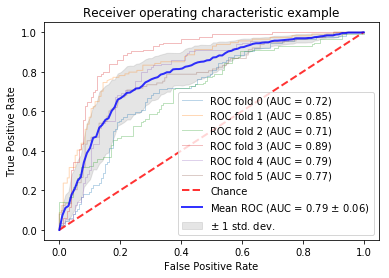

In [8]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
'''
# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
'''
dataset = pd.read_csv('data/winequality.csv')
dataset.isnull().any() #does a True/False for nulls
dataset = dataset.fillna(method='ffill') 
dataset['5_wine'] = dataset.quality.map( lambda x: 1.0 if x==5 else 0.0 )

X_dataset=dataset.columns
#note we drop the column headers too w/ . value
X = dataset.drop(['quality','5_wine'], axis=1).values 
y = dataset['5_wine'].values
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Receiver Operating Characteristic (ROC) multiclass


# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################



/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


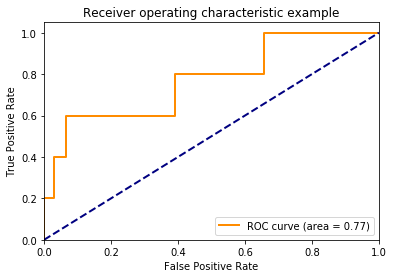

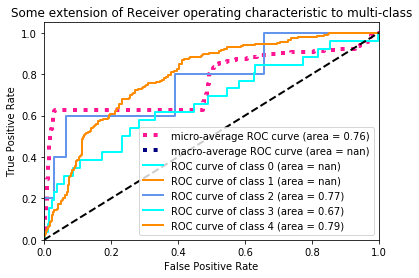

In [12]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

dataset = pd.read_csv('data/winequality.csv')
dataset.isnull().any() #does a True/False for nulls
dataset = dataset.fillna(method='ffill') 

X = dataset.drop(['quality'], axis=1).values 
y = dataset['quality'].values

# Binarize the output
y = label_binarize(y, classes=[1,2,3,4,5])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=42))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



#Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



# Stochastic Gradient Descent

SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)

In [14]:
import numpy as np
from sklearn import linear_model
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = np.array([1, 1, 2, 2])
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X, Y)
y_pred = clf.predict(X)
y_pred_prob= clf.predict_prob(X)
clf.score(y_pred,Y)
''' make matrix denser or sparser

clf.sparsify() #for l1 (ie lasso)
clf.densify()  #switch back
'''


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

# Manual Gradient descent

In [ ]:
def paramater_update(betas, grad, lr=0.02):
    return betas - lr * grad

def mse_grad_func(X, beta_guess, y):
    return np.dot(X.T, np.dot(X, beta_guess)-y)

def gradient_descent_with_conv(X, y, beta_guess = np.ones((2,1)), lr = .02,
                               max_iter = 10000, epsilon = 0.01): 
    #lr = learning rate, how big a step
    #epsilon = cost function setting when to stop. if the change is <, stop
    cost_array = []
    for i in range(max_iter):
        cost_new = cost_function(X, y, beta_guess)
        cost_array.append(cost_new)
        if i > 2:
            cost_old = cost_array[-2]
            if abs(cost_old - cost_new)/cost_old < epsilon:
                print('Convergence met at iteration {0}.'.format(i))
                break
        grad = mse_grad_func(X, beta_guess, y)
        beta_guess = paramater_update(beta_guess, grad)
    return beta_guess

betas = gradient_descent_with_conv(X, y, max_iter=10000, epsilon = 0.01)  # you may need to play with the learning rate, max_iter, and epsilon
print("Calculated betas: {}".format(np.around(betas.ravel(), decimals = 2)))
